In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [4]:
# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

In [5]:
# try different learning_rate
# learning_rate = 65535  # ? it works too hahaha
learning_rate = 0.1
# learning_rate = 1e-10  # small learning rate won't work either

In [6]:
model = tf.keras.Sequential()

In [7]:
model.add(tf.keras.layers.Dense(units=3, input_dim=3, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=learning_rate), metrics=['accuracy'])

In [9]:
history = model.fit(x_data, y_data, epochs=1000, verbose=0)

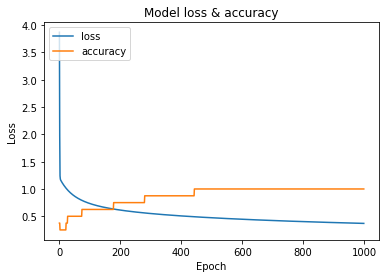

[1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [11]:
# predict
print("Prediction: ", model.predict(x_test))

Prediction:  [[5.4395120e-08 4.3257102e-04 9.9956733e-01]
 [1.2954947e-09 9.2097012e-05 9.9990785e-01]
 [3.6057918e-07 2.3288117e-03 9.9767083e-01]]


In [12]:
# Calculate the accuracy
print("Accuracy: ", model.evaluate(x_test, y_test)[1])

1/1 [==============================] - 0s 1ms/step - loss: 9.5226e-04 - accuracy: 1.0000
Accuracy:  1.0
